366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
366.0
370.0
max u: 46360.926 min u: 44116.665 delta u: 2244.2609999999986
max u_t: 45522.029 min u_t: 1 delta u_t: 45521.029
clipping values above 46136.4999
clipping top data set values above 46136.4999
clipping values below 224.42609999999988
clipping top values below 224.42609999999988


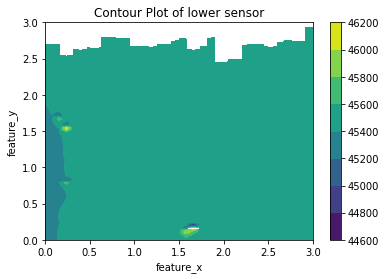

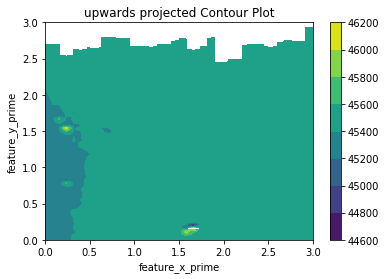

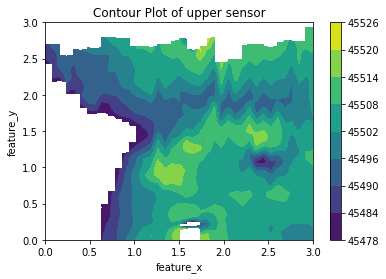

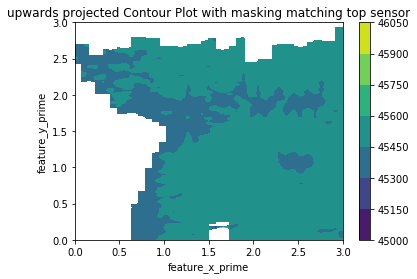

In [2]:
#notes:
# 1 ) line spacing is not consistant in excel 
    # each even line descends and odd ascends 
        # new line roughly starts where old last line ends
            # not exactly though. off by around .1(also inconsistant )
    # each line has a diffrent number of readings .
        #the 2d numpy array has to have consistant dementions, so I have been amending drop out
        # values to the end of each transverse to fit it to the correct dimensions 
    # these two issues make it hard to know where to place the appended values. I think its creating 
      # staggering in the graph thats not in the raw data.
        
 # solution notes    
    # length of array is dtermined by longest transverse
    

# 2 ) flipping the transveres and lines around is going to complicate keeping the coordinates 
    #tagged to each reading
        #  might have to make a new CSV file with the same adjustments if we want the coordinates tagged 
    


# to do:
# fix note 1 (first )
# fix note 2
# improve clipping method (second if not fixed by 1)
    # think about other forms of filtering
# line by line comparison (third, needs to happen, but can wait till graphs look similar)
    # think about methods to compare to top data set other than visualy

# decide if top plot should be clipped at the same values as bottom or by its own new precent
# filtering for upper data?
# export to excel?

import pandas
import math
import numpy as np
import matplotlib.pyplot as plt

# a few constants
    # reminder: Dz should always be negative
        # I believe its in units of Km... so for one meter Dz = -.001

peak_reduction_precent = 10
trough_reduction_precent = 10
Delta_x = .5
Delta_y = .057
drop_out_value = 1
Dz = -.001
k=1

# locate file
loc = ("C:/Users/clayton/Desktop/KAMBE-MARO-MAG-OPTI-U079-120617-excel.xlsx")
exe = pandas.read_excel(loc)


# pull data from array 
arr_raw = exe.to_numpy()
x = arr_raw[:,0]
y = arr_raw[:,1]
u_b_raw = arr_raw[:,4]
u_t_raw = arr_raw[:,3]
line = arr_raw[:,9]
u_t = u_t_raw
u_b = u_b_raw

# identify line break index
   # 12942 will have to be generalized
i = 0
i_1 = 1
line_break_index = np.zeros(40)
line_index = 0
for i in range(13942):
    if line[i] == (40 - i_1):
        i_1 += 1
        line_break_index[line_index] = i
        line_index += 1

#determine length of array (y)
i = 0
length = 1
test_length = 1

for i in range(len(line_break_index)-1):
    test_length = line_break_index[i+1] - line_break_index[i] 
    if test_length >= length:
        length = test_length
    print(length)
length = int(math.ceil(length))

#remove dropouts from top array

i = 0
dropout_log_t = np.zeros(len(u_t))
i_dropout = 0

for i in range(len(u_t_raw)):
    if type(u_t_raw[i]) == str:
        u_t[i] = drop_out_value
        dropout_log_t[i_dropout] = i
        i_dropout += 1
        

#clip data if needed (set precents above)
# find max and min U bottom
u_max = 1
u_min = u_b_raw[0]

for i in range(len(u_b_raw)):
    if u_max < u_b_raw[i]:
        u_max = u_b_raw[i]
        
    if u_min > u_b_raw[i]:
        u_min = u_b_raw[i]
delta_u = u_max - u_min
precent = delta_u / 100
print('max u:',u_max , "min u:" , u_min, "delta u:", delta_u)

# find max and min top
u_max_t = 1
u_min_t = u_t[0]

for i in range(len(u_t_raw)):
    
    if u_max_t < u_t_raw[i]:
        u_max_t = u_t_raw[i]
        
    if u_min_t > u_t_raw[i]:
        u_min_t = u_t_raw[i]
delta_u_t = u_max_t - u_min_t
precent_t = delta_u_t / 100
print('max u_t:',u_max_t , "min u_t:" , u_min_t, "delta u_t:", delta_u_t)

# clip values
peak_clip_threshold_value =u_max - (precent * peak_reduction_precent)
trough_clip_threshold_value = (precent * trough_reduction_precent)

if peak_reduction_precent == 0:
    print("no peak clipping performed")
    print("no peak clipping performed on top data set")
else:
    print("clipping values above", peak_clip_threshold_value)
    for i in range(len(u_b_raw)):
        if u_b_raw[i] > peak_clip_threshold_value:
            u_b[i] = drop_out_value
    print("clipping top data set values above", peak_clip_threshold_value)
    for i in range(len(u_t_raw)):
        if u_t_raw[i] > peak_clip_threshold_value:
            u_t[i] = drop_out_value
                        
if trough_reduction_precent == 0:
    print("no trough clipping performed")
    print("no trough clipping performed on top data set")
else:
    print("clipping values below", trough_clip_threshold_value)
    for i in range(len(u_b_raw)):
        if u_b_raw[i] < trough_clip_threshold_value:
            u_b[i] = drop_out_value
    print("clipping top values below", trough_clip_threshold_value)
    for i in range(len(u_t_raw)):
        if u_t_raw[i] < trough_clip_threshold_value:
            u_t[i] = drop_out_value 


# form 2d array bottom and top
u_raw_2d = np.zeros((length,40))
u_raw_2d_t = np.zeros((length,40))
i = 0
i_append = 0


        # column b and t are selected chunks out of the raw 1d potential array
for i in range(39):
    i_2 = int(line_break_index[i])
    i_3 = int(line_break_index[i+1])
    
    holding_b = np.array(u_b[i_2:i_3])
    holding_t = np.array(u_t[i_2:i_3])
    column_b = np.empty_like(holding_b) 
    column_b = np.empty_like(holding_t) 

    # transpose odd lines and fit into 2d array
        #   column_b = column_b is redudndant, but i think there will be an error with 0 if not and it 
        #    makes it less of a headace for me to think about... could be fixed later i guess

    if i == 0:
        column_b = holding_b
        column_t = holding_t

    elif (i % 2 != 0):
        column_b = np.flip(holding_b)
        column_t = np.flip(holding_t)

    else:
        column_b = holding_b
        column_t = holding_t
        
    # fits column to lengh of 2d array 
    
    
    if length > len(column_b):
        i_4 = 0
        i_append = length - len(column_b)
        for i_4 in range(i_append):
            column_b = np.append(column_b, drop_out_value )
    if length > len(column_t):
        i_4 = 0
        i_append = length - len(column_t)
        for i_4 in range(i_append):
            column_t = np.append(column_t, drop_out_value )
            
    u_raw_2d[:,i] = column_b
    u_raw_2d_t[:,i] = column_t
        
    
    
    
unmasked_u_raw_2d =  u_raw_2d
unmasked_u_raw_2d_t = u_raw_2d_t
    
# mask drop outs
i = 0
mask_b = np.zeros_like(u_raw_2d, dtype=bool)
mask_t = np.zeros_like(u_raw_2d_t, dtype=bool)

for i in range(40):
    
    i_1 = 0 
    for i_1 in range(length):
        
        if u_raw_2d[i_1,i] == drop_out_value:
            mask_b[i_1,i] = True
    
        if u_raw_2d_t[i_1,i] == drop_out_value:
            mask_t[i_1,i] = True
        i_1 += 1
    i += 1
u_raw_2d = np.ma.array(u_raw_2d, mask=mask_b)  
u_raw_2d_t = np.ma.array(u_raw_2d_t, mask=mask_t)      
    
    
    
# plot raw data bottom
feature_x = np.linspace(0.0, 3.0, 39)
feature_y = np.linspace(0.0, 3.0, length)

[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots()

Z = u_raw_2d[0:length,0:39]

cs_0 = ax.contourf(X, Y, Z)
ax.set_title('Contour Plot of lower sensor')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
cbar = fig.colorbar(cs_0)
plt.show()

# math and projected plot 


a = u_raw_2d
b = unmasked_u_raw_2d

FFt2_U = np.fft.fft2(a)
FFt_Psi = np.exp(Dz*k)
FFt_U_Final = FFt2_U * FFt_Psi


U_final_unmasked_projected = np.fft.ifft2(FFt_U_Final)
U_final = np.ma.array(U_final_unmasked_projected, mask=mask_b)

# plot projected data
feature_x_prime = np.linspace(0.0, 3.0, 39)
feature_y_prime = np.linspace(0.0, 3.0, length)

[X_p, Y_p] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots()

Z_p = U_final[0:length,0:39]

cs_1 = ax.contourf(X_p, Y_p, Z_p)
ax.set_title('upwards projected Contour Plot')
ax.set_xlabel('feature_x_prime')
ax.set_ylabel('feature_y_prime')

cbar = fig.colorbar(cs_1)
  
plt.show()

# upper sensor plot
feature_x_t = np.linspace(0.0, 3.0, 39)
feature_y_t = np.linspace(0.0, 3.0, length)

[X_t, Y_t] = np.meshgrid(feature_x_t, feature_y_t)
  
fig, ax = plt.subplots()

Z_t = u_raw_2d_t[0:length,0:39]

cs_2 = ax.contourf(X_t, Y_t, Z_t)
ax.set_title('Contour Plot of upper sensor')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

cbar = fig.colorbar(cs_2)
plt.show()

# test masking from upper senser plased on projected data set
U_final_test = np.ma.array(U_final, mask=mask_t)
feature_x_prime = np.linspace(0.0, 3.0, 39)
feature_y_prime = np.linspace(0.0, 3.0, length)

[X_p, Y_p] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots()

Z_p_test = U_final_test[0:length,0:39]

cs = ax.contourf(X_p, Y_p, Z_p_test)
ax.set_title('upwards projected Contour Plot with masking matching top sensor')
ax.set_xlabel('feature_x_prime')
ax.set_ylabel('feature_y_prime')

cbar = fig.colorbar(cs)
  
plt.show()


max u: 46360.926 min u: 44116.665 delta u: 2244.2609999999986
max u_t: 45522.029 min u_t: 1 delta u_t: 45521.029
clipping values above 46136.4999
clipping top data set values above 46136.4999
clipping values below 224.42609999999988
clipping top values below 224.42609999999988


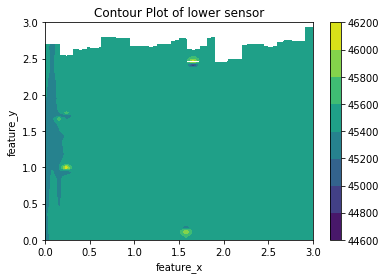

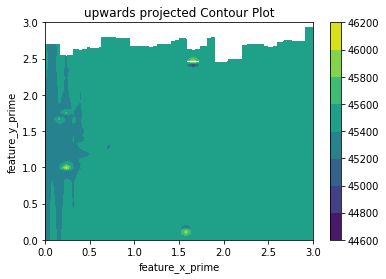

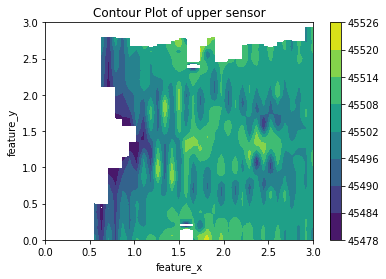

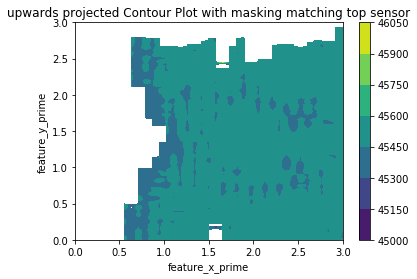